<a href="https://colab.research.google.com/github/Sanjivkumar100/ZeoTap/blob/main/Sanjiv_Kumar_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
customers = pd.read_csv('Customers.csv')
transactions= pd.read_csv('Transactions.csv')

In [12]:
transactionssummary=transactions.groupby('CustomerID').agg({'ProductID':'nunique','TotalValue':'sum','TransactionID':'count'}).reset_index()
transactionssummary.rename(columns={'ProductID':'UniqueProducts','TotalValue':'TotalSpend','TransactionID':'TransactionCounts'},inplace=True)
customers=pd.merge(customers,transactionssummary,on='CustomerID',how='left')

In [13]:
customers.fillna({
    "TotalSpend": 0,
    "TransactionCount": 0,
    "UniqueProducts": 0
}, inplace=True)

In [4]:
customers.isna().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0
UniqueProducts,0
TotalSpend,0
TransactionCounts,1


In [14]:
mean_value = customers["TransactionCounts"].mean()
customers["TransactionCounts"].fillna(mean_value, inplace=True)

<ipython-input-14-9d4979c1087b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers["TransactionCounts"].fillna(mean_value, inplace=True)


In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

customerregioncoded=ohe.fit_transform(customers[['Region']])
customerregioncoded_df=pd.DataFrame(customerregioncoded.toarray(),columns=ohe.get_feature_names_out(['Region']))
customers=pd.concat([customers.drop(['Region'],axis=1),customerregioncoded_df],axis=1)

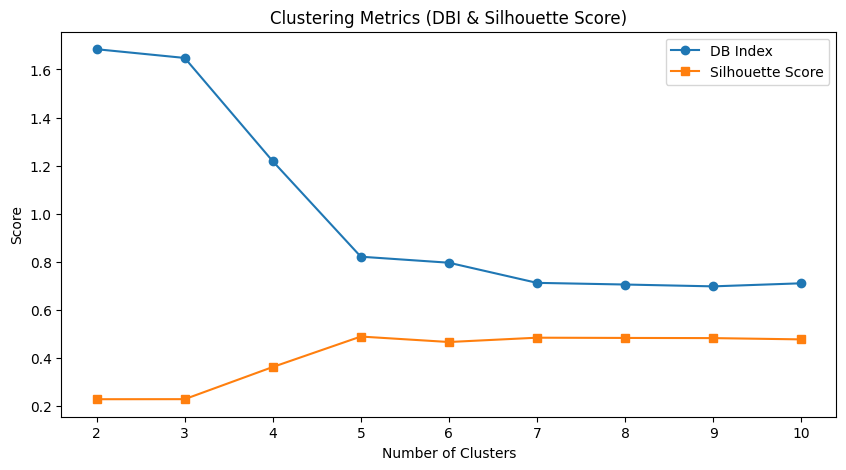

0.6986222099019839

In [17]:
from typing import final
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
clusteringdata=customers.drop(columns=['CustomerID','SignupDate','CustomerName'])
scaler=StandardScaler()
scaleddata=scaler.fit_transform(clusteringdata)
dbiscore=[]
silhouette=[]
for nclusters in range(2,11):
    kmeans=KMeans(n_clusters=nclusters,random_state=42)

    labels=kmeans.fit_predict(scaleddata)
    dbiscore.append(davies_bouldin_score(scaleddata,labels))
    silhouette.append(silhouette_score(scaleddata,labels))

optimalclusters=2+dbiscore.index(min(dbiscore))
finalkmeans=KMeans(n_clusters=optimalclusters,random_state=42)
finallabels=finalkmeans.fit_predict(scaleddata)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), dbiscore, marker='o', label='DB Index')
plt.plot(range(2, 11), silhouette, marker='s', label='Silhouette Score')
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Clustering Metrics (DBI & Silhouette Score)')
plt.legend()
plt.show()


customers['Cluster']=finallabels
optimalclusters
min(dbiscore)